<a href="https://colab.research.google.com/github/AbhayMudgal/BTP/blob/main/BTP_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Static Dislocation Results
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image, ImageOps
from PIL import Image
import numpy as np

%matplotlib inline 
plt.rcParams["figure.figsize"] = (10,10)
import PIL

In [2]:
def B(delE):
  deE = -delE * 200
  if deE < -5:
    deE = 0
  if deE > 1:
    deE = 1
  U = math.exp(deE)
  return min(U, 1)

def E( X, Y, W, H):
  pi = np.pi
  ans = 0
  for i in range(-4, 5):
    ans += ( np.sin(2*pi*Y) / ( np.cosh(2*pi*(X - (i*W/H))) - np.cos(2* pi *Y)))
  
  return ans


In [3]:
#entering parameters and calculating the number of solute atoms.

conc = float (input("Enter percentage concentration of solute: "))
Mr = float (input("Enter mobility ratio: "))


Enter percentage concentration of solute: 0.1
Enter mobility ratio: 0.01


In [4]:
W = int (input("Enter Width of the simulation cell: "))
H = int (input("Enter Height of the simulation cell: "))

Enter Width of the simulation cell: 100
Enter Height of the simulation cell: 100


In [11]:
#initializing array  and randomly distributing solutes in the matrix


array = np.zeros((W, H), int)

sol_loc = []
loc_set = set()
sol = (H*W*conc)/100
a = 0
R = sol*Mr


x_dis = int (W/2)
y_dis = int (H/2)


array[x_dis][y_dis] = -1
loc_set.add((x_dis, y_dis))

while (a < sol):
  i = random.randint(0, W-1)
  j = random.randint(0, H-1)

  if array[i][j] == 0:
    array[i][j] = 1
    a += 1
    loc_set.add((i, j))
    sol_loc.append([i, j])   
      
  if (a==sol): 
    break 

array[x_dis+1][y_dis] = 1
array[x_dis+1][y_dis+1] = 1

In [6]:
print(len(sol_loc))
print(len(loc_set))

10
11


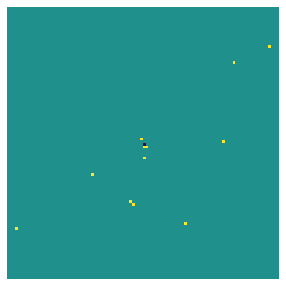

In [12]:
#projecting the array as image
plt.rcParams["figure.figsize"] = (5,5)
plt.grid(False)
plt.axis('off')
image = plt.imshow(array, interpolation='nearest')
plt.show()

In [ ]:
#randomly selecting a solute atom.

iter = int (input("Enter Number of Iterations: "))
vel = []
speed = 0
for i in range (0, iter):
    
    n = random.randint(0, sol-1)
    x = sol_loc[n][0]
    y = sol_loc[n][1]
  
    for i in range(4):
      xi = x
      yi = y
    
      if (i==0):
        xi = (x - 1) % W
      elif (i==1):
        yi = (y - 1) % H
      elif (i==2):
        xi = (x + 1) % W
      else:
        yi = (y + 1) % H
      
      if ((xi, yi) not in loc_set):
        
        X = (x - x_dis) / W
        Y = (y - y_dis) / H
        Xi = (xi - x_dis) / W
        Yi = (yi - y_dis) / H
        

        delE = E(Xi, Yi, W, H) - E(X, Y, W, H)
        n = random.random()
        b = B(delE)

        if n < b:
          m = random.random()
          if delE*200 < 0 or m>0.8:
            array[x][y] = 0
            array[xi][yi] = 1

            loc_set.remove((x, y))
            loc_set.add((xi, yi))
            sol_loc.append([xi, yi])
            sol_loc.remove([x, y])
            
            break



Enter Number of Iterations: 100000


In [ ]:
#projecting the array as image
plt.rcParams["figure.figsize"] = (12,12)
plt.grid(False)
plt.axis('off')
image = plt.imshow(array, interpolation='nearest')
plt.show()